In [1]:
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import scipy as sp
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [2]:
import re
from sklearn.preprocessing import LabelEncoder
import nltk
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from gensim.models import Word2Vec
from nltk import word_tokenize

nltk.download("stopwords")
from nltk.tokenize import word_tokenize
from sklearn import preprocessing
import keras
from sklearn.model_selection import KFold
stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dineshpasupuleti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten, Embedding
from keras.utils import to_categorical
from keras.backend import clear_session

In [4]:
df = pd.read_csv("./enron1.csv")
df = df.drop(["Unnamed: 0"], axis=1)
df

,filepath,email,body,processedBody,sender,subject,date,folder,processed_subject,recipient,...,SubjectAverageWordLength,PolarityScore,SubjectPolarityScore,NumRecipients,Most POS,Greetings,Most Common Word,Most POS Subject,Greetings in Subject,Most Common Word in Subject
0,symes-k/sent/1290.,Message-ID: <7046567.1075841908922.JavaMail.ev...,Chris -\nWould you mind e-mailing Evelyn your ...,Chris -\nWould you mind e-mailing Evelyn your ...,symes-k,Automated Power Exchange,"Mon, 30 Apr 2001 07:55:00 -0700 (PDT)",sent,Automated Power Exchange,Chris H Foster,...,7.333333,0.200000,0.0,1,PRP,Chris,you,NNP,Automated,automated
1,symes-k/sent/36.,Message-ID: <22564088.1075841879733.JavaMail.e...,"Looks great, Anna.","Looks great, Anna.",symes-k,Re: Holiday Party Mailing List,"Fri, 27 Oct 2000 03:32:00 -0700 (PDT)",sent,Holiday Party Mailing List,Anna Mehrer,...,5.750000,0.800000,0.0,1,NNP,Looks,looks,NNP,Holiday,holiday
2,symes-k/sent/667.,Message-ID: <21601140.1075841894251.JavaMail.e...,"I came, I saw, I viewed.....and now I will eat...","I came, I saw, I viewed.....and now I will eat...",symes-k,"Re: One tomato, two tomato, three tomato, four!","Thu, 22 Feb 2001 10:05:00 -0800 (PST)",sent,"One tomato, two tomato, three tomato, four!",Grace Rodriguez,...,3.363636,0.250000,0.0,1,PRP,I,i,CD,One,tomato
3,symes-k/sent/1023.,Message-ID: <5071824.1075841902668.JavaMail.ev...,Following are the deals I changed to the corre...,Following are the deals I changed to the corre...,symes-k,Re: More deals found by Will Smith,"Thu, 29 Mar 2001 05:45:00 -0800 (PST)",sent,More deals found by Will Smith,Cara Semperger,...,4.166667,0.150000,0.5,1,NN,Following,-,NNP,More,more
4,symes-k/sent/759.,Message-ID: <11201614.1075841896397.JavaMail.e...,Thanks!,Thanks!,symes-k,Re: 535799,"Mon, 5 Mar 2001 00:53:00 -0800 (PST)",sent,535799,Sean Crandall,...,6.000000,0.250000,0.0,1,NNS,Thanks,thanks,CD,535799,535799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44038,nemec-g/sent/752.,Message-ID: <12630318.1075842683424.JavaMail.e...,Attached for your review is a draft of the Los...,Attached for your review is a draft of the Los...,nemec-g,Lost Creek IT Agreement,"Mon, 21 Aug 2000 11:54:00 -0700 (PDT)",sent,Lost Creek IT Agreement,"Mark Whitt@ECT, James Hoff",...,5.000000,0.187500,0.0,2,NNP,Attached,.,NNP,Lost,lost
44039,nemec-g/sent/893.,Message-ID: <24469094.1075842686699.JavaMail.e...,"Chris, Attached is a redlined of the revised ...","Chris, Attached is a redlined of the revised ...",nemec-g,ENA-Lost Creek IT Agreement,"Fri, 27 Oct 2000 07:06:00 -0700 (PDT)",sent,ENA-Lost Creek IT Agreement,choekenga@br-inc.com,...,6.000000,0.200000,0.0,1,NNP,Chris,.,NNP,ENA,ena-lost
44040,nemec-g/sent/351.,Message-ID: <9777889.1075842673263.JavaMail.ev...,Let's talk.\n\n\n---------------------- Forwar...,Let's talk.\n\n,nemec-g,Agreement to Upgrade and Operate Natural Gas P...,"Mon, 17 Jan 2000 07:59:00 -0800 (PST)",sent,Agreement to Upgrade and Operate Natural Gas P...,Eric Gillaspie,...,6.222222,0.000000,0.1,1,VB,Let,let,NNP,Agreement,agreement
44041,nemec-g/sent/2360.,Message-ID: <3389850.1075842908651.JavaMail.ev...,I plan on attending the dinner.,I plan on attending the dinner.,nemec-g,Re: Enron Law Conference - Dinner Attendance,"Tue, 10 Apr 2001 06:38:00 -0700 (PDT)",sent,Enron Law Conference - Dinner Attendance,Sara Davidson,...,5.833333,0.000000,0.0,1,PRP,I,i,NNP,Enron,enron


In [5]:
# create preprocess_text function
def preprocess_text(text):
   # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

In [6]:
nltk.download('wordnet')
df['finalBody'] = df['processedBody'].apply(preprocess_text)
df['finalSubject'] = df['processed_subject'].apply(preprocess_text)
df

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dineshpasupuleti/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,filepath,email,body,processedBody,sender,subject,date,folder,processed_subject,recipient,...,SubjectPolarityScore,NumRecipients,Most POS,Greetings,Most Common Word,Most POS Subject,Greetings in Subject,Most Common Word in Subject,finalBody,finalSubject
0,symes-k/sent/1290.,Message-ID: <7046567.1075841908922.JavaMail.ev...,Chris -\nWould you mind e-mailing Evelyn your ...,Chris -\nWould you mind e-mailing Evelyn your ...,symes-k,Automated Power Exchange,"Mon, 30 Apr 2001 07:55:00 -0700 (PDT)",sent,Automated Power Exchange,Chris H Foster,...,0.0,1,PRP,Chris,you,NNP,Automated,automated,chris - would mind e-mailing evelyn contact in...,automated power exchange
1,symes-k/sent/36.,Message-ID: <22564088.1075841879733.JavaMail.e...,"Looks great, Anna.","Looks great, Anna.",symes-k,Re: Holiday Party Mailing List,"Fri, 27 Oct 2000 03:32:00 -0700 (PDT)",sent,Holiday Party Mailing List,Anna Mehrer,...,0.0,1,NNP,Looks,looks,NNP,Holiday,holiday,"look great , anna .",holiday party mailing list
2,symes-k/sent/667.,Message-ID: <21601140.1075841894251.JavaMail.e...,"I came, I saw, I viewed.....and now I will eat...","I came, I saw, I viewed.....and now I will eat...",symes-k,"Re: One tomato, two tomato, three tomato, four!","Thu, 22 Feb 2001 10:05:00 -0800 (PST)",sent,"One tomato, two tomato, three tomato, four!",Grace Rodriguez,...,0.0,1,PRP,I,i,CD,One,tomato,"came , saw , viewed ..... eat . thanks update ...","one tomato , two tomato , three tomato , four !"
3,symes-k/sent/1023.,Message-ID: <5071824.1075841902668.JavaMail.ev...,Following are the deals I changed to the corre...,Following are the deals I changed to the corre...,symes-k,Re: More deals found by Will Smith,"Thu, 29 Mar 2001 05:45:00 -0800 (PST)",sent,More deals found by Will Smith,Cara Semperger,...,0.5,1,NN,Following,-,NNP,More,more,"following deal changed correct time zone , per...",deal found smith
4,symes-k/sent/759.,Message-ID: <11201614.1075841896397.JavaMail.e...,Thanks!,Thanks!,symes-k,Re: 535799,"Mon, 5 Mar 2001 00:53:00 -0800 (PST)",sent,535799,Sean Crandall,...,0.0,1,NNS,Thanks,thanks,CD,535799,535799,thanks !,535799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44038,nemec-g/sent/752.,Message-ID: <12630318.1075842683424.JavaMail.e...,Attached for your review is a draft of the Los...,Attached for your review is a draft of the Los...,nemec-g,Lost Creek IT Agreement,"Mon, 21 Aug 2000 11:54:00 -0700 (PDT)",sent,Lost Creek IT Agreement,"Mark Whitt@ECT, James Hoff",...,0.0,2,NNP,Attached,.,NNP,Lost,lost,attached review draft lost creek - ena agreeme...,lost creek agreement
44039,nemec-g/sent/893.,Message-ID: <24469094.1075842686699.JavaMail.e...,"Chris, Attached is a redlined of the revised ...","Chris, Attached is a redlined of the revised ...",nemec-g,ENA-Lost Creek IT Agreement,"Fri, 27 Oct 2000 07:06:00 -0700 (PDT)",sent,ENA-Lost Creek IT Agreement,choekenga@br-inc.com,...,0.0,1,NNP,Chris,.,NNP,ENA,ena-lost,"chris , attached redlined revised ena - lost c...",ena-lost creek agreement
44040,nemec-g/sent/351.,Message-ID: <9777889.1075842673263.JavaMail.ev...,Let's talk.\n\n\n---------------------- Forwar...,Let's talk.\n\n,nemec-g,Agreement to Upgrade and Operate Natural Gas P...,"Mon, 17 Jan 2000 07:59:00 -0800 (PST)",sent,Agreement to Upgrade and Operate Natural Gas P...,Eric Gillaspie,...,0.1,1,VB,Let,let,NNP,Agreement,agreement,let 's talk .,agreement upgrade operate natural gas pipeline...
44041,nemec-g/sent/2360.,Message-ID: <3389850.1075842908651.JavaMail.ev...,I plan on attending the dinner.,I plan on attending the dinner.,nemec-g,Re: Enron Law Conference - Dinner Attendance,"Tue, 10 Apr 2001 06:38:00 -0700 (PDT)",sent,Enron Law Conference - Dinner Attendance,Sara Davidson,...,0.0,1,PRP,I,i,NNP,Enron,enron,plan attending dinner .,enron law conference - dinner attendance


In [7]:
def text_process(text):
    #Remove Punctuation Marks
    text = text.lower()
    nopunct = ""
    clean_final = []
    for char in text:
        if re.match(r"\w", char) or re.match(r" ", char):
            nopunct += char
        elif re.match(r" ", char):
            nopunct += char
        else:
            nopunct += " "
    for word in nopunct.split():
        if not word in stop_words:
            clean_final.append(word)
    return " ".join(clean_final)

In [8]:
df['finalBody'] = df['finalBody'].apply(text_process)
df['finalSubject'] = df['finalSubject'].apply(text_process)
df

,filepath,email,body,processedBody,sender,subject,date,folder,processed_subject,recipient,...,SubjectPolarityScore,NumRecipients,Most POS,Greetings,Most Common Word,Most POS Subject,Greetings in Subject,Most Common Word in Subject,finalBody,finalSubject
0,symes-k/sent/1290.,Message-ID: <7046567.1075841908922.JavaMail.ev...,Chris -\nWould you mind e-mailing Evelyn your ...,Chris -\nWould you mind e-mailing Evelyn your ...,symes-k,Automated Power Exchange,"Mon, 30 Apr 2001 07:55:00 -0700 (PDT)",sent,Automated Power Exchange,Chris H Foster,...,0.0,1,PRP,Chris,you,NNP,Automated,automated,chris would mind e mailing evelyn contact info...,automated power exchange
1,symes-k/sent/36.,Message-ID: <22564088.1075841879733.JavaMail.e...,"Looks great, Anna.","Looks great, Anna.",symes-k,Re: Holiday Party Mailing List,"Fri, 27 Oct 2000 03:32:00 -0700 (PDT)",sent,Holiday Party Mailing List,Anna Mehrer,...,0.0,1,NNP,Looks,looks,NNP,Holiday,holiday,look great anna,holiday party mailing list
2,symes-k/sent/667.,Message-ID: <21601140.1075841894251.JavaMail.e...,"I came, I saw, I viewed.....and now I will eat...","I came, I saw, I viewed.....and now I will eat...",symes-k,"Re: One tomato, two tomato, three tomato, four!","Thu, 22 Feb 2001 10:05:00 -0800 (PST)",sent,"One tomato, two tomato, three tomato, four!",Grace Rodriguez,...,0.0,1,PRP,I,i,CD,One,tomato,came saw viewed eat thanks update grace kate,one tomato two tomato three tomato four
3,symes-k/sent/1023.,Message-ID: <5071824.1075841902668.JavaMail.ev...,Following are the deals I changed to the corre...,Following are the deals I changed to the corre...,symes-k,Re: More deals found by Will Smith,"Thu, 29 Mar 2001 05:45:00 -0800 (PST)",sent,More deals found by Will Smith,Cara Semperger,...,0.5,1,NN,Following,-,NNP,More,more,following deal changed correct time zone per s...,deal found smith
4,symes-k/sent/759.,Message-ID: <11201614.1075841896397.JavaMail.e...,Thanks!,Thanks!,symes-k,Re: 535799,"Mon, 5 Mar 2001 00:53:00 -0800 (PST)",sent,535799,Sean Crandall,...,0.0,1,NNS,Thanks,thanks,CD,535799,535799,thanks,535799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44038,nemec-g/sent/752.,Message-ID: <12630318.1075842683424.JavaMail.e...,Attached for your review is a draft of the Los...,Attached for your review is a draft of the Los...,nemec-g,Lost Creek IT Agreement,"Mon, 21 Aug 2000 11:54:00 -0700 (PDT)",sent,Lost Creek IT Agreement,"Mark Whitt@ECT, James Hoff",...,0.0,2,NNP,Attached,.,NNP,Lost,lost,attached review draft lost creek ena agreement...,lost creek agreement
44039,nemec-g/sent/893.,Message-ID: <24469094.1075842686699.JavaMail.e...,"Chris, Attached is a redlined of the revised ...","Chris, Attached is a redlined of the revised ...",nemec-g,ENA-Lost Creek IT Agreement,"Fri, 27 Oct 2000 07:06:00 -0700 (PDT)",sent,ENA-Lost Creek IT Agreement,choekenga@br-inc.com,...,0.0,1,NNP,Chris,.,NNP,ENA,ena-lost,chris attached redlined revised ena lost creek...,ena lost creek agreement
44040,nemec-g/sent/351.,Message-ID: <9777889.1075842673263.JavaMail.ev...,Let's talk.\n\n\n---------------------- Forwar...,Let's talk.\n\n,nemec-g,Agreement to Upgrade and Operate Natural Gas P...,"Mon, 17 Jan 2000 07:59:00 -0800 (PST)",sent,Agreement to Upgrade and Operate Natural Gas P...,Eric Gillaspie,...,0.1,1,VB,Let,let,NNP,Agreement,agreement,let talk,agreement upgrade operate natural gas pipeline...
44041,nemec-g/sent/2360.,Message-ID: <3389850.1075842908651.JavaMail.ev...,I plan on attending the dinner.,I plan on attending the dinner.,nemec-g,Re: Enron Law Conference - Dinner Attendance,"Tue, 10 Apr 2001 06:38:00 -0700 (PDT)",sent,Enron Law Conference - Dinner Attendance,Sara Davidson,...,0.0,1,PRP,I,i,NNP,Enron,enron,plan attending dinner,enron law conference dinner attendance


In [9]:
# Encoding class names with LabelEncoder()
y = LabelEncoder().fit_transform(df["sender"])
#Dropped all unrequired columns/attributes
X = df.drop(["sender", "filepath", "email", "body", "processedBody", "folder","subject", "processed_subject"], axis=1)

In [10]:
input_data = df['finalBody'] 

In [11]:
# split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(input_data, y, test_size=0.1)

In [12]:
# one-hot encode the output labels
Y_train = to_categorical(y_train, 13)
Y_test = to_categorical(y_test, 13)

In [13]:
# prepare tokenizer
t = Tokenizer()

# fit the tokenizer on the docs
t.fit_on_texts(input_data)
vocab_size = len(t.word_index) + 1

# integer encode the documents
X_train_encoded_docs = t.texts_to_sequences(X_train)
X_test_encoded_docs = t.texts_to_sequences(X_test)

In [14]:
# pad documents to a max length of 150 words
max_length = 150
X_train_padded_docs = pad_sequences(X_train_encoded_docs, maxlen=max_length, padding='post')
X_test_padded_docs = pad_sequences(X_test_encoded_docs, maxlen=max_length, padding='post')

print(X_train_padded_docs[0])

[333   4  66  44  93  72  58  15   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0]


In [15]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 300, input_length=max_length))
model.add(LSTM(100, dropout=0.4))
model.add(Flatten())
model.add(Dense(13, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 300)          9839700   
                                                                 
 lstm (LSTM)                 (None, 100)               160400    
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 13)                1313      
                                                                 
Total params: 10001413 (38.15 MB)
Trainable params: 10001413 (38.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# train the model
history = model.fit(X_train_padded_docs, Y_train, validation_split=0.1, epochs=20, verbose=1)

Epoch 1/20
1115/1115 [==============================] - 123s 110ms/step - loss: 2.4620 - accuracy: 0.1788 - val_loss: 2.4577 - val_accuracy: 0.1779
Epoch 2/20
1115/1115 [==============================] - 127s 114ms/step - loss: 2.4404 - accuracy: 0.1849 - val_loss: 2.4464 - val_accuracy: 0.1809
Epoch 3/20
1115/1115 [==============================] - 128s 115ms/step - loss: 2.4296 - accuracy: 0.1884 - val_loss: 2.4315 - val_accuracy: 0.1811
Epoch 4/20
1115/1115 [==============================] - 128s 114ms/step - loss: 2.1867 - accuracy: 0.2539 - val_loss: 1.9789 - val_accuracy: 0.3277
Epoch 5/20
1115/1115 [==============================] - 129s 116ms/step - loss: 1.9065 - accuracy: 0.3587 - val_loss: 1.8745 - val_accuracy: 0.3898
Epoch 6/20
1115/1115 [==============================] - 128s 115ms/step - loss: 1.7586 - accuracy: 0.4055 - val_loss: 1.6914 - val_accuracy: 0.4490
Epoch 7/20
1115/1115 [==============================] - 132s 118ms/step - loss: 1.5580 - accuracy: 0.4870 - val_

In [17]:
# evaluate the model
accr = model.evaluate(X_test_padded_docs, Y_test)
print("Test Set:\n  Loss: {:0.3f}\n   Accuracy: {:0.3f}".format(accr[0], accr[1]))

138/138 [==============================] - 3s 24ms/step - loss: 0.8380 - accuracy: 0.8229
Test Set:
  Loss: 0.838
   Accuracy: 0.823


In [18]:
print(accr)

[0.8380081653594971, 0.8229284882545471]


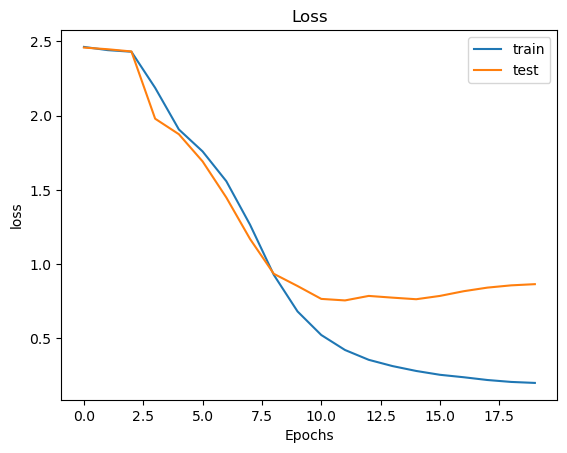

In [23]:
# plot the loss
plt.title("Loss")
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.show()

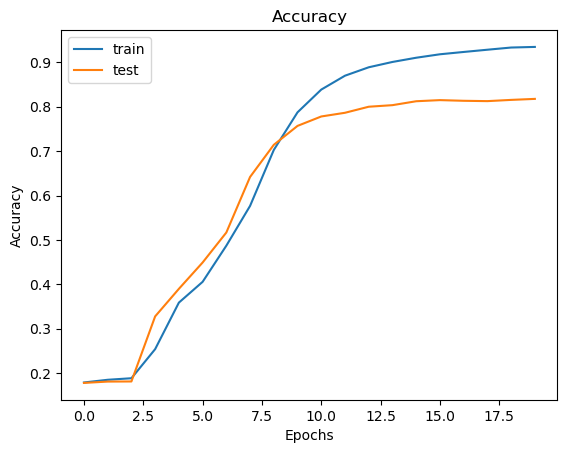

In [24]:
# plot the accuracy
plt.title("Accuracy")
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.show()